# Exploring Hacker News Posts
---

## Introduction
In this notebook, I will explore the [Hacker News](https://news.ycombinator.com/) posts. 
Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

I'm specifically interested in posts whose titles begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question. Below are a couple examples:

```
Ask HN: How to improve my personal website?
Ask HN: Am I the only one outraged by Twitter shutting down share counts?
Ask HN: Aby recent changes to CSS that broke mobile?
```
Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting. Below are a couple of examples:

```
Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'
Show HN: Something pointless I made
Show HN: Shanhu.io, a programming playground powered by e8vm 
```

I'll compare these two types of posts to determine the following:

* Do Ask HN or Show HN receive more comments on average?
* Do posts created at a certain time receive more comments on average?

## Gather
The data set is already gathered and is available as a .csv file with 20k posts

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
main_df = pd.read_csv('hacker_news.csv')

In [3]:
main_df.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


Below are descriptions of the columns:

* id: The unique identifier from Hacker News for the post
* title: The title of the post
* url: The URL that the posts links to, if the post has a URL
* num_points: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
* num_comments: The number of comments that were made on the post
* author: The username of the person who submitted the post
* created_at: The date and time at which the post was submitted

Remember I only want to analyze posts whose titles begin with either Ask HN or Show HN.

In [4]:
# Creating a new Dataframe that only contains posts with titles Ask HN or Show HN
df = main_df[main_df.title.str.contains('^Ask HN|^Show HN')]
df = df.reset_index()
df = df.drop(columns='index')

In [5]:
# Creating a new column 'type' to determine whether this post is Ask or Show HN
df['type'] = df.title.str.extract(r'(.*HN):')

In [6]:
df.head()

,id,title,url,num_points,num_comments,author,created_at,type
0,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,8/16/2016 9:55,Ask HN
1,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc,11/25/2015 14:03,Show HN
2,10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,11/22/2015 13:43,Ask HN
3,11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,5/2/2016 10:14,Ask HN
4,12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,8/2/2016 14:20,Ask HN


## Assess
I will now assess our data set for any available quality or tidiness issues

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2903 non-null   int64 
 1   title         2903 non-null   object
 2   url           1128 non-null   object
 3   num_points    2903 non-null   int64 
 4   num_comments  2903 non-null   int64 
 5   author        2903 non-null   object
 6   created_at    2903 non-null   object
 7   type          2897 non-null   object
dtypes: int64(3), object(5)
memory usage: 181.6+ KB


* created_at has wrong data type

## Clean
* convert `created_at` to datetime object

In [8]:
df['created_at'] = pd.to_datetime(df['created_at'])

## Test

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            2903 non-null   int64         
 1   title         2903 non-null   object        
 2   url           1128 non-null   object        
 3   num_points    2903 non-null   int64         
 4   num_comments  2903 non-null   int64         
 5   author        2903 non-null   object        
 6   created_at    2903 non-null   datetime64[ns]
 7   type          2897 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 181.6+ KB


## Analysis
After I have prepared our data I will now answer the two desired questions
* Do Ask HN or Show HN receive more comments on average?
* Do posts created at a certain time receive more comments on average?

Let's answer the first question first

### Do Ask HN or Show HN receive more comments on average?

In [10]:
df.type.value_counts()

Ask HN     1736
Show HN    1161
Name: type, dtype: int64

In [11]:
df_mean = df.groupby('type').mean()
df_mean.drop(columns='id',inplace=True)
df_mean.rename(columns={'num_points':'mean_num_points', 'num_comments':'mean_num_comments'}, inplace=True)
df_mean

,mean_num_points,mean_num_comments
type,,
Ask HN,15.111751,14.073157
Show HN,27.575366,10.324720


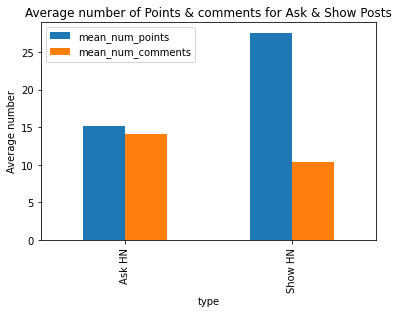

In [12]:
df_mean.plot(kind='bar', title= 'Average number of Points & comments for Ask & Show Posts', ylabel= 'Average number');

From the previous analysis I conclude that:
* The **Ask HN** posts has **Higher** Average number of **comments**.
* The **Show HN** posts has **Higher** Average number of **points**.

### Do posts created at a certain time receive more comments on average?

In [13]:
df_time = df[['created_at', 'num_points', 'num_comments']].copy()
df_time['month'] = df['created_at'].dt.strftime('%B');
df_time['day'] = df['created_at'].dt.strftime('%A');
df_time['hour'] = df['created_at'].dt.strftime('%H');
df_time

,created_at,num_points,num_comments,month,day,hour
0,2016-08-16 09:55:00,2,6,August,Tuesday,09
1,2015-11-25 14:03:00,26,22,November,Wednesday,14
2,2015-11-22 13:43:00,28,29,November,Sunday,13
3,2016-05-02 10:14:00,1,1,May,Monday,10
4,2016-08-02 14:20:00,1,3,August,Tuesday,14
...,...,...,...,...,...,...
2898,2016-07-04 08:50:00,2,2,July,Monday,08
2899,2016-03-05 01:25:00,10,4,March,Saturday,01
2900,2016-05-21 09:22:00,4,2,May,Saturday,09
2901,2016-04-07 03:04:00,2,1,April,Thursday,03


In [14]:
df_month = df_time.groupby(['month']).mean()
df_month

,num_points,num_comments
month,,
April,20.562500,11.035714
August,25.062992,18.019685
December,12.601990,8.233831
February,18.296460,8.765487
January,19.355212,12.625483
July,18.308696,10.173913
June,27.390244,14.692683
March,23.232472,14.516605
May,18.772093,17.195349


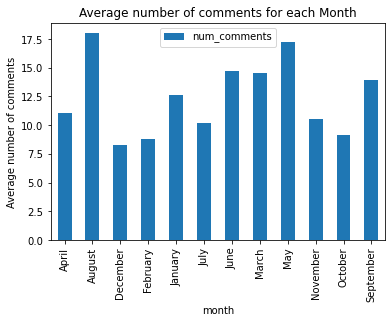

In [15]:
df_month.plot(y= 'num_comments',kind='bar', title= 'Average number of comments for each Month', ylabel= 'Average number of comments');

Analyzing the months I find out that:
* **August** has the highest average number of comments

In [16]:
df_day = df_time.groupby('day').mean()
df_day

,num_points,num_comments
day,,
Friday,21.266504,14.863081
Monday,20.621677,12.083845
Saturday,16.852740,12.732877
Sunday,28.675373,16.119403
Thursday,19.381166,11.959641
Tuesday,16.505112,10.646217
Wednesday,19.952941,11.543137


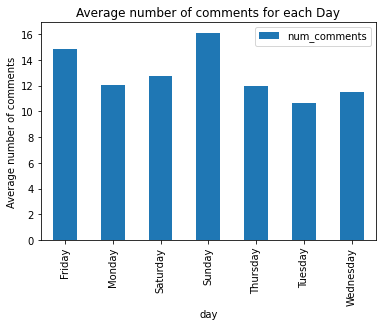

In [17]:
df_day.plot(y= 'num_comments',kind='bar', title= 'Average number of comments for each Day', ylabel= 'Average number of comments');

Analyzing the days I find out that:

* **Sunday** has the highest average number of comments

In [18]:
df_hour = df_time.groupby('hour').mean()
df_hour

,num_points,num_comments
hour,,
00,19.082353,10.894118
01,15.909091,10.556818
02,12.875000,17.136364
03,13.000000,8.740741
04,10.616438,8.000000
05,10.092308,8.030769
06,16.100000,8.983333
07,14.250000,9.433333
08,12.609756,8.012195


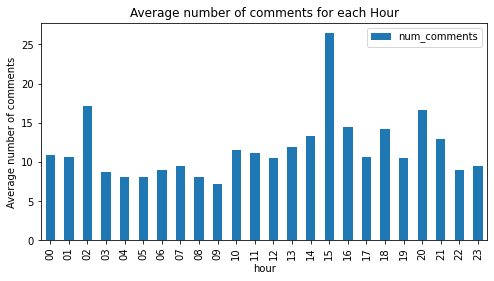

In [19]:
df_hour.plot(y= 'num_comments',kind='bar', figsize=(8,4), title= 'Average number of comments for each Hour', ylabel= 'Average number of comments');

Analyzing the hours we find out that:

* **3 p.m** has the highest average number of comments

## Conclusion
* The Ask HN posts has Higher Average number of comments (\~14) while the Show HN has (\~10).
* The Show HN posts has Higher Average number of points (\~27) while the Ask HN has (\~15).
* August has the highest average number of comments.
* Sunday has the highest average number of comments.
* 3 p.m has the highest average number of comments.

## Acknowledgement

This project is a guided project provided by Dataquest to understand and practice fundamentals of Python for Data Science.